# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find_all(class_ = 'table') # find the table
rows = soup.find_all(class_= "data-row") # distinguish the ros of the table


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')  # Find all columns in the row
    cols = [col.text.strip() for col in cols]  # Strip whitespace
    if cols:  
        data.append(cols)

print(data[:3]) #check the data list by printing just the first part of the list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']]


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(data, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [8]:
# Confirm DataFrame was created successfully
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Change the "terrestrial_date" column to datetime
mars_data_df["terrestrial_date"] = pd.to_datetime(mars_data_df["terrestrial_date"], unit='ns')

# Change the "sol", "ls", and "month" columns to numeric datatypes
mars_data_df["sol"] = pd.to_numeric(mars_data_df["sol"])
mars_data_df["ls"] = pd.to_numeric(mars_data_df["ls"])
mars_data_df["month"] = pd.to_numeric(mars_data_df["month"])

#Change the "min_temp" and "pressure" columns to float datatypes
mars_data_df["min_temp"] = mars_data_df["min_temp"].astype(float)
mars_data_df["pressure"] = mars_data_df["pressure"].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Count the number of unique months using nunique
months_count = mars_data_df["month"].nunique()

#Print the response
print(f"There are {months_count} months on Mars.")


There are 12 months on Mars.


In [13]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sold recorded in the data using nunique
sols_count = mars_data_df["sol"].nunique()

#Print the response
print(f"There are {sols_count} sols worth of data in the scraped dataset.")


There are 1867 sols worth of data in the scraped dataset.


In [14]:
# 3. What is the average minimum temperature by month?

# Use a groupby to find the average minimum temperature of each month.
avg_min_temp_by_month = mars_data_df.groupby('month')['min_temp'].mean()

# Print the monthly averages.
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


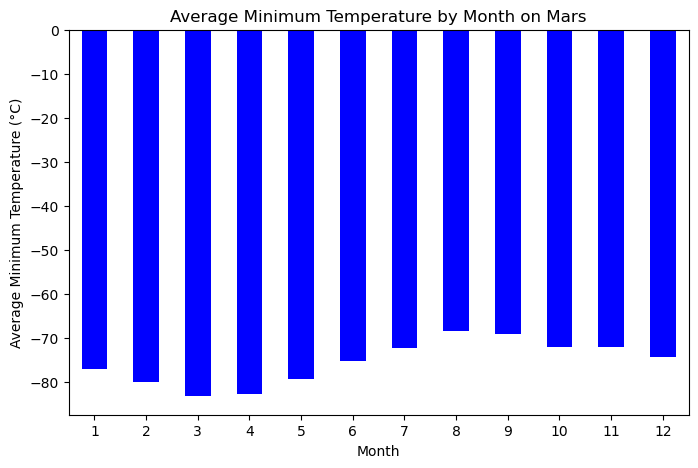

<Figure size 640x480 with 0 Axes>

In [55]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

# Save the plot
plt.savefig('Saved_Data\average_min_temp_by_month.png', bbox_inches='tight', dpi=300)

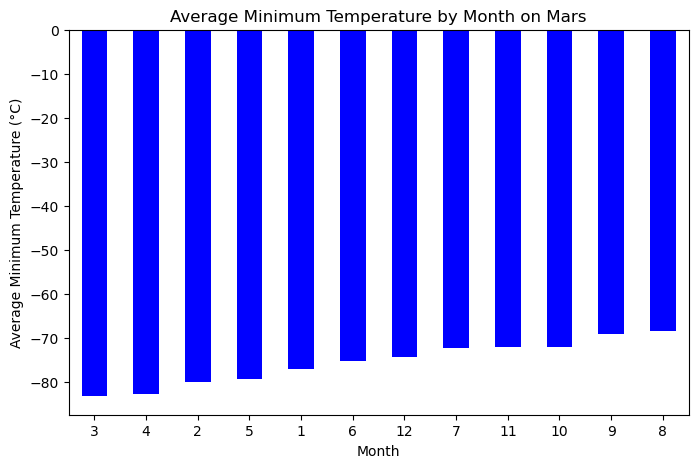

In [45]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort avg_min_temp_by_month in ascending order
avg_min_temp_by_month = avg_min_temp_by_month.sort_values(ascending=True)

# Plot the average minimum temperature by month in ascending order
avg_min_temp_by_month.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

# Save the plot
plt.savefig('Saved_Data\average_min_temp_by_month_sorted.png', bbox_inches='tight', dpi=300)

In [15]:
# 4. What is the average pressure by month?

# Use a groupby to find the average pressure of each month.
avg_pressure_by_month = mars_data_df.groupby('month')['pressure'].mean()

# Print the monthly averages.
print(avg_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


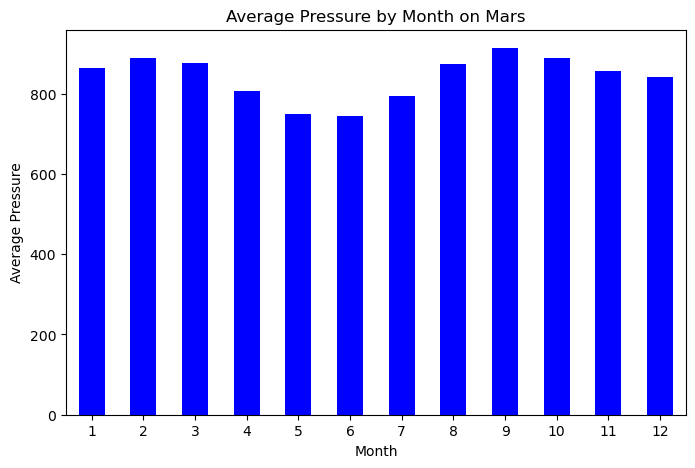

In [16]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.show()

# Save the plot
plt.savefig('Saved_Data\average_pressure_by_month.png', bbox_inches='tight', dpi=300)

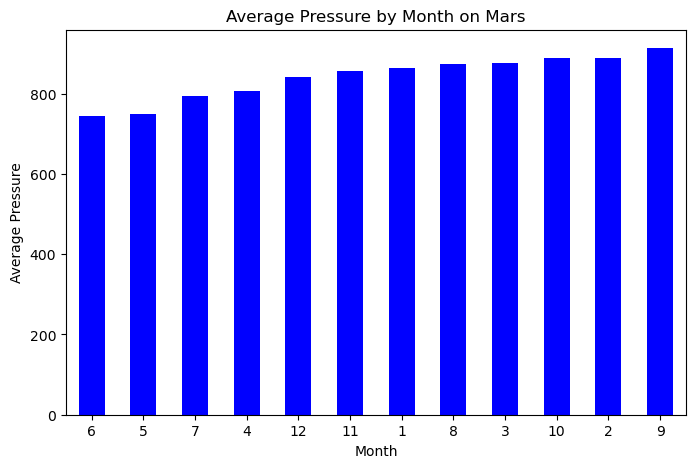

In [43]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort avg_min_temp_by_month in ascending order
avg_pressure_by_month = avg_pressure_by_month.sort_values(ascending=True)

# Plot the average pressure by month in ascending order
avg_pressure_by_month.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.show()

# Save the plot
plt.savefig('Saved_Data\average_pressure_by_month_sorted.png', bbox_inches='tight', dpi=300)

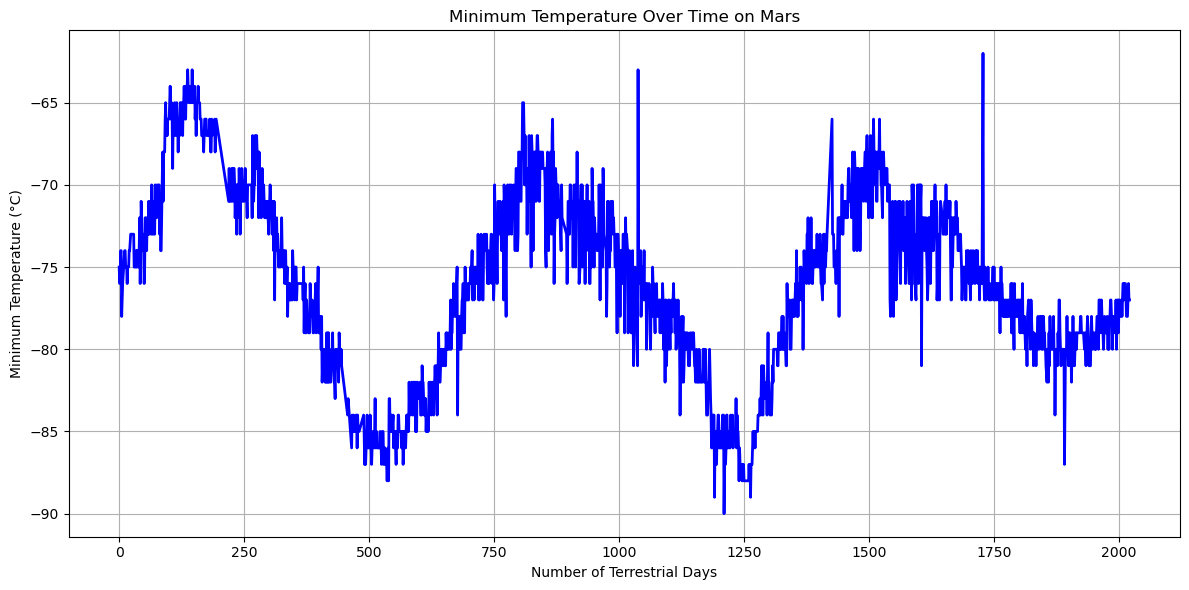

In [38]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Calculate the elapsed days across the dataset.
# This is so that I can use an x-axis that counts days, instead of just reflecting terrestrial date.
mars_data_df['elapsed_days'] = (mars_data_df['terrestrial_date'] - mars_data_df['terrestrial_date'].min()).dt.days

# Plot the daily minimum temperature of each observation
plt.figure(figsize=(12, 6))
plt.plot(mars_data_df['elapsed_days'], mars_data_df['min_temp'], color='blue', linestyle='-', linewidth=2)
plt.title('Minimum Temperature Over Time on Mars')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.grid()
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig('Saved_Data\min_temp_over_time.png', bbox_inches='tight', dpi=300)

#### Minimum Temperature

What are the coldest months on Mars?

By calculating the average minimum temperature for each month, we found that Month 3 is the coldest month on Mars, with an average minimum temperature of -83.307292.
A bar chart was plotted to visually represent the average minimum temperatures across all months, highlighting the temperature fluctuations throughout the Martian year.
After Month 3, the second coldest month is Month 4, with an average minimum temperature of -82.74742, followed by Month 2 (-79.932584), and Month 5 (-79.308725).

#### Atmospheric Pressure

By calculating the average atmospheric pressure for each month, we found that Month 9 has the highest atmospheric pressure on Mars, with an average pressure of 913.305970 Pa, and Month 6 has the lowest atmospheric pressure, at 745.054422 Pa.
A bar chart was plotted to visually represent the average atmospheric pressure across all months, highlighting the pressure fluctuations throughout the Martian year.


#### Year Length

A Martian year is approximately 690 Earth days. This is visually estimated by plotting the daily minimum temperature over time. The temperature fluctuations create a visualization of how Mars cycles through lower and higher temperatures throughout a Martian year, and the space between two peaks or two troughs on the plot can provide markers for how many terrestrial days it takes for Mars to cycle through a full Martian year. This illustrates the relationship between the Martian and terrestrial calendars.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [48]:
# Write the data to a CSV
mars_data_df.to_csv('Saved_Data\mars_weather_data.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Jean\AppData\Local\Temp\ipykernel_8884\3960725866.py:2: SyntaxWarning: invalid escape sequence '\m'
  mars_data_df.to_csv('Saved_Data\mars_weather_data.csv', index=False)


In [49]:
browser.quit()